## <b>Table of Contents</b>

1) Importing required libraries

2) Loading the train and test data

3) Checking Basic Information about Data

4) Data Preprocessing on Train Data

5) Data Preprocessing on Test Data

6) Splitting the train data into independent and dependent variables

6) Feature Selection: Viewing Important Features

7) Fitting model using RandomForest

8) Hyperparameter Tuning

9) Saving the model to use it again

Importing Required Libraries

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

Loading the train and test data

In [3]:
df_train = pd.read_excel("Data/Data_Train.xlsx")
df_test = pd.read_excel("Data/Test_set.xlsx")

Checking Basic Information about data
1) Looking at data

2) Checking for null values/data type of the columns

In [4]:
#1
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#2
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Data Preprocessing on Train data
1) Droping Rows containing Null values

2) Converting Date of journey into datetime object and splitting it into journey_day and journey_month columns

3) Extracting hours and mins from "Dep_time"

4) Extracting hours and mins from "Arrival_time"

5) Extracting hours and mins from "Duration"

Handling Categorical Data
n-1 dummy encoding: Nominal Data
Label Encoding: Ordinal Data

6) Performing One hot encoding on "Airline" column

7) Performing One hot enconding on "Source" column

8) Performing One hot enconding on "Destination" column

9) Dropping "Route" and "Additonal_info" columns

10) Performing LabelEncoding on "Total_Stops" column

11) Concatenation of the created dummy variables and dropping the categorical variables which were dummied

In [7]:
#1) As columns Route and Total_Stops have null values. We need to drop the rows containing null values
df_train.dropna(inplace = True)
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#2) Converting Date of journey into datetime object
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'],format = "%d/%m/%Y")

#Extracting Days and months
df_train['Journey_day'] = df_train['Date_of_Journey'].dt.day
df_train['Journey_month'] = df_train['Date_of_Journey'].dt.month

#We drop the Date of journey column as it is of no use
df_train.drop(["Date_of_Journey"],axis=1,inplace=True)
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
#3) "Dep_Time" means time at which airplane leaves

#Converting "Dep_Time" into datetime object
df_train['Dep_Time'] = pd.to_datetime(df_train['Dep_Time'])

#Extracting hours and minutes
df_train['Dep_hour'] = df_train['Dep_Time'].dt.hour
df_train['Dep_min'] = df_train['Dep_Time'].dt.minute

#We drop the "Dep_time" column as it is of no use
df_train.drop(["Dep_Time"],axis=1,inplace = True)
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [10]:
#4) "Arrival_Time" means times at which airplane arrives

#Converting "Arrival_Time" into datetime object
df_train['Arrival_Time'] = pd.to_datetime(df_train['Arrival_Time'])

#Extracting hours and minutes
df_train['Arrival_hour'] = df_train['Arrival_Time'].dt.hour
df_train['Arrival_min'] = df_train['Arrival_Time'].dt.minute

#We drop the "Arrival_time" column as it is of no use
df_train.drop(["Arrival_Time"],axis=1,inplace = True)
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [11]:
#5) Duration is the time taken by a plane to reach a destination

#Some of the duration values contains both "h" as well "m"
#But some only "h". So it is problematic

#making a new duration list where complete format will be present of h and m
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

df_train.loc[:,"Duration"]=duration

#Extracting hours and mins

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

#Adding duration_hours and duration_mins list to train_data dataframe

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

df_train.drop(["Duration"], axis = 1, inplace = True)
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


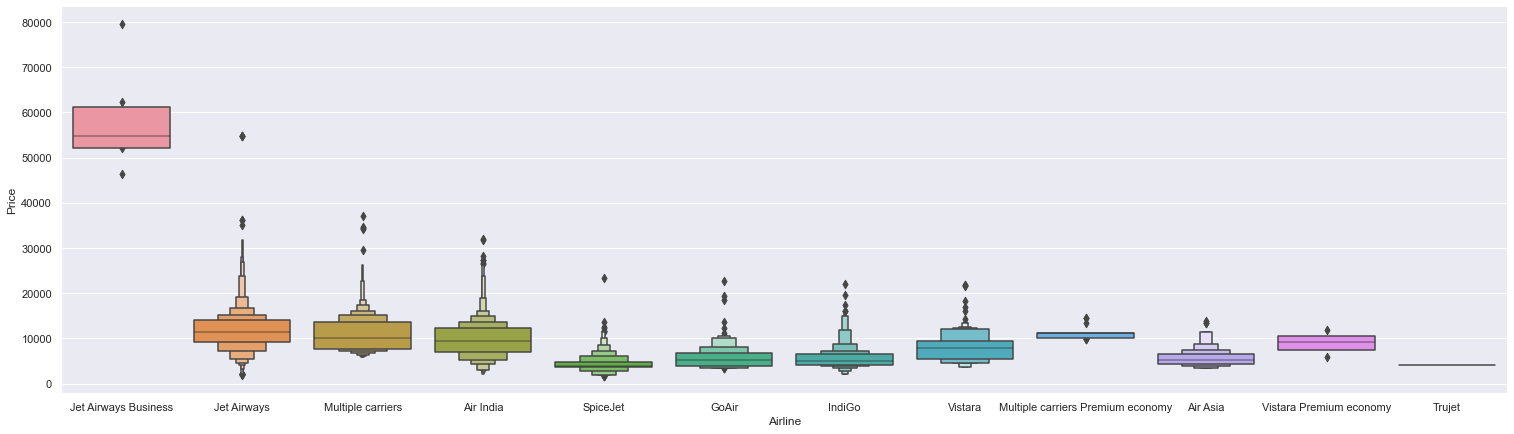

In [12]:
#Handling Categorical Data

#1) For "airline" column
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3.5)
plt.show()

#We can see in the graph that "Jet Airways Business" have the highest price and rest all almost have similar medians

In [13]:
#1) Performing one hot enconding on "Airline" column
cat_airline = df_train["Airline"].unique()
print(cat_airline)
#Converting Airline column to Categorical Variable
df_train["Airline"]=pd.Categorical(df_train["Airline"],categories = cat_airline)

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [14]:
Airline = df_train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_Jet Airways,Airline_SpiceJet,Airline_Multiple carriers,Airline_GoAir,Airline_Vistara,Airline_Air Asia,Airline_Vistara Premium economy,Airline_Jet Airways Business,Airline_Multiple carriers Premium economy,Airline_Trujet
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


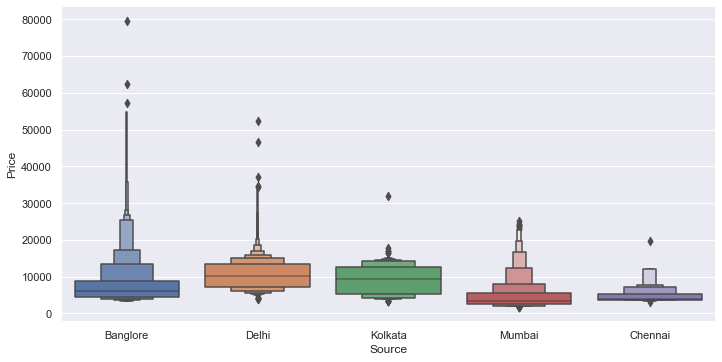

In [15]:
#2) For "Source"

sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

#From the graph we can see that the medians of the all sources are nearby to each other

In [16]:
#2) Performing one hot enconding on "Source" column
cat_source = df_train["Source"].unique()
print(cat_source)
#Converting Source column to Categorical Variable
df_train["Source"]=pd.Categorical(df_train["Source"],categories = cat_source)

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [17]:
Source = df_train[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,0


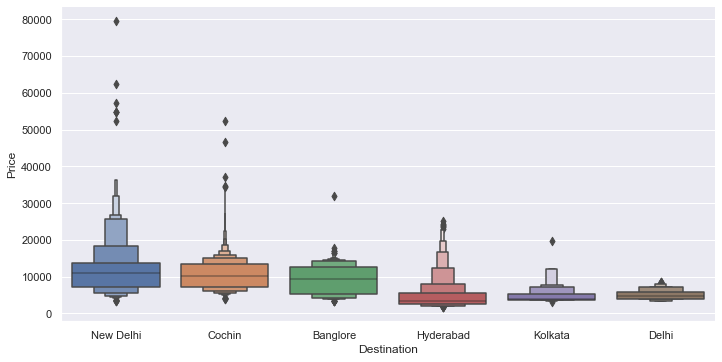

In [18]:
#3) For "Destination"

sns.catplot(y = "Price", x = "Destination", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

#From the graph we can see that the medians of the all destination are near to each other

In [19]:
#3) Performing one hot enconding on "Destination" column
cat_destination = df_train["Destination"].unique()
print(cat_destination)
#Converting Destination column to Categorical Variable
df_train["Destination"]=pd.Categorical(df_train["Destination"],categories = cat_destination)

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [20]:
Destination = df_train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad
0,0,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,0


In [21]:
#4) Dropping "Route" and "Additonal_info" columns

print(df_train['Route'].value_counts())
print(df_train['Additional_Info'].value_counts())

#There's nothing that can be done of Route column and
#Additional_Info column contains most of the "No_info" value

df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df_train.head()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → VNS → DEL → HYD       1
BLR → BOM → IXC → DEL       1
CCU → RPR → HYD → BLR       1
CCU → IXZ → MAA → BLR       1
CCU → IXB → DEL → BLR       1
Name: Route, Length: 128, dtype: int64
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [22]:
#5) Performing LabelEncoding on "Total_Stops" column
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

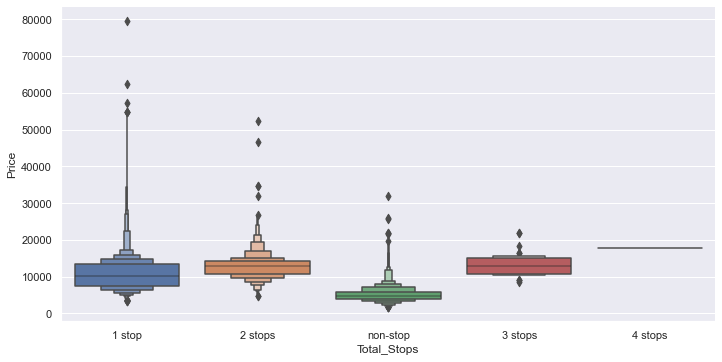

In [24]:
sns.catplot(y = "Price", x = "Total_Stops", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 2)
plt.show()

#So we can see that as Total_Stops increases the median price also increases

In [25]:
#As "Total_Stops" column is of ordinal data type
#We assign the values with corresponding keys

df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [26]:
#6) Concatenation of the created dummy variables and dropping the categorical variables which were dummied

train_data = pd.concat([df_train, Airline, Source, Destination], axis = 1)
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print(train_data.shape)
train_data.head()

(10682, 30)


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_Jet Airways,Airline_SpiceJet,Airline_Multiple carriers,Airline_GoAir,Airline_Vistara,Airline_Air Asia,Airline_Vistara Premium economy,Airline_Jet Airways Business,Airline_Multiple carriers Premium economy,Airline_Trujet,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing on Test Data

In [27]:
# Preprocessing

#1) Droping Rows containing Null values
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

#2) Converting Date of journey into datetime object and splitting it into journey_day and journey_month columns
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

#3) Extracting hours and mins from "Dep_time"
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

#4) Extracting hours and mins from "Arrival_time"
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

#5) Extracting hours and mins from "Duration"
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)

##Handling Categorical Data

#1) Performing One hot encoding on "Airline" column
df_test["Airline"]=pd.Categorical(df_test["Airline"],categories=cat_airline)
Airline = df_test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

#2) Performing One hot enconding on "Source" column
df_test["Source"]=pd.Categorical(df_test["Source"],categories=cat_source)
Source = df_test[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

#3) Performing One hot enconding on "Destination" column
df_test["Destination"]=pd.Categorical(df_test["Destination"],categories=cat_destination)
Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

#4) Dropping "Route" and "Additonal_info" columns
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#5) Performing LabelEncoding on "Total_Stops" column
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

#6) Concatenation of the created dummy variables and dropping the categorical variables which were dummied
test_data = pd.concat([df_test, Airline, Source, Destination], axis = 1)
test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print(test_data.shape)
test_data.head()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
(2671, 29)


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_Jet Airways,Airline_SpiceJet,Airline_Multiple carriers,Airline_GoAir,Airline_Vistara,Airline_Air Asia,Airline_Vistara Premium economy,Airline_Jet Airways Business,Airline_Multiple carriers Premium economy,Airline_Trujet,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad
0,1,6,6,17,30,4,25,10,55,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
#Splitting the data into dependent and independent variables
#Independent Variables

X = train_data.loc[:, train_data.columns != "Price"]

#Dependent Variable
y = train_data.loc[:, "Price"]

Feature Selection : Viewing Important Features

1) Heatmap

2) Feature Importance

3) SelectKBest

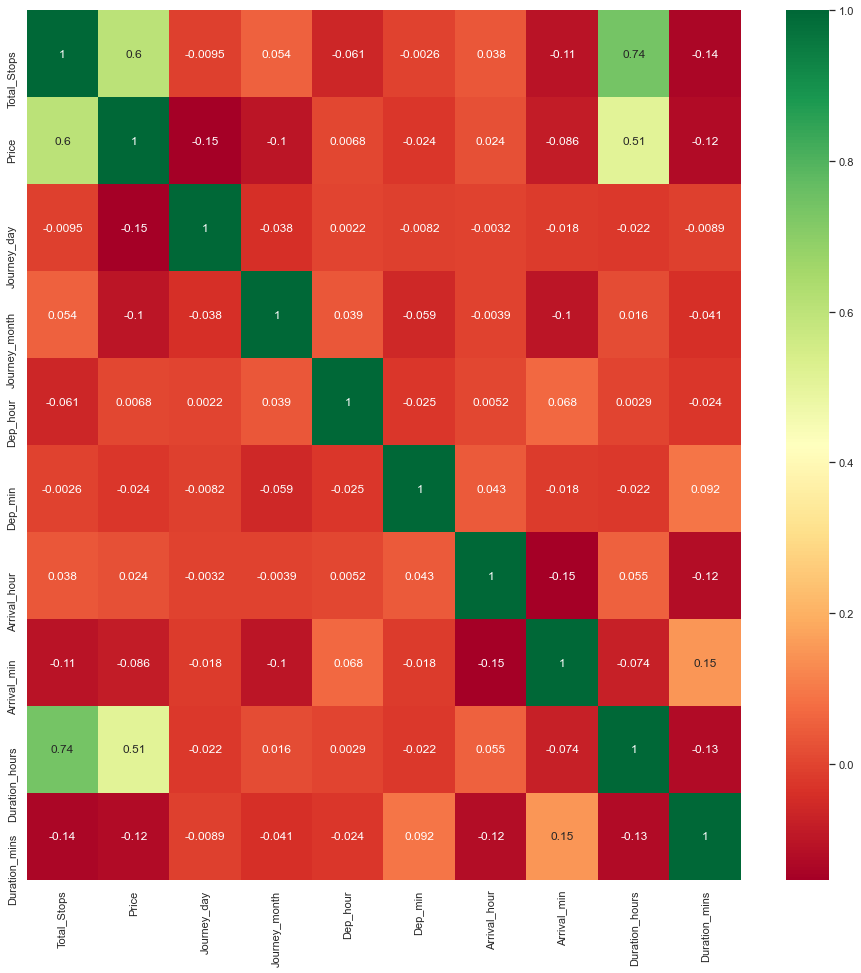

In [29]:
#Finding Correlation between Independent and Dependent variables
plt.figure(figsize = (16,16))
sns.heatmap(df_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

#From the heatmap we can see that "Price" has a higher correlation with "Total_Stops" & "Duration_hours"
#Also Total_Stops have a higher correlation with duration_hours

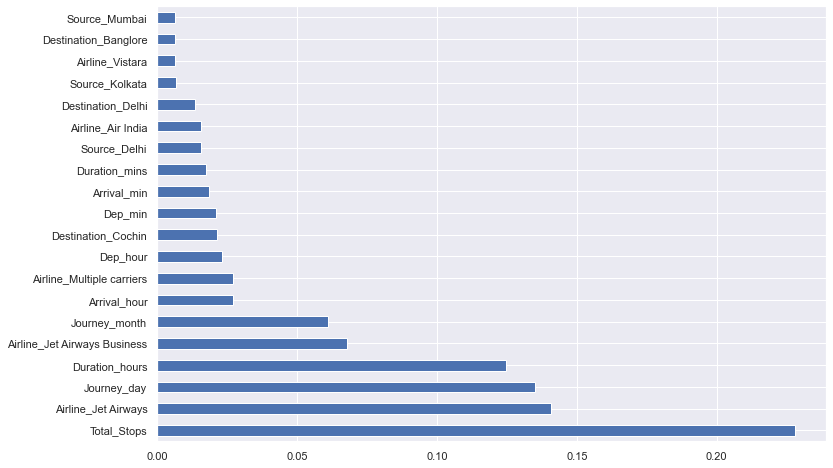

In [30]:
# Important feature using ExtraTreesRegressor with its plot

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#From the graph we can see that "Total_Stops" is the most important feature 
#for price followed by "Journey_day" and "Duration_hours"

### Fitting Model Using RandomForest
1) Splitting the data into train and test in order to do prediction

2) Importing model and fitting data

3) Prediction w.r.t X_test

4) Checing R-Squared and normality of error terms

5) In regression check RMSE Score

6) Plot graph

In [31]:
#1) Splitting the data into train and test in order to do prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [46]:
#2) Importing model and fitting data
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
reg_rf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
#3) Prediction w.r.t X_test
y_pred = reg_rf.predict(X_test)

In [48]:
#4) Checing R-Squared and normality of error terms
print(reg_rf.score(X_train, y_train), reg_rf.score(X_test, y_test))

# Seems like a good R-Squared value

0.9507291223696583 0.8447462968088887


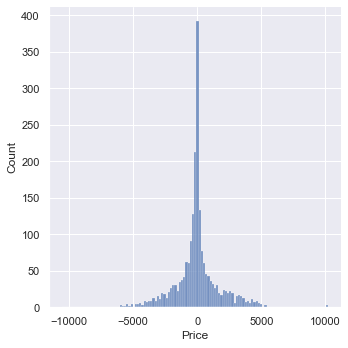

In [49]:
sns.displot(y_test-y_pred)
plt.show()

#seems to follow gaussian distribution

In [50]:
#5) In regression check RMSE Score
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1821.5229051955732


### Hyperparameter tuning
1) Choosing a method and importing it
*RandomizedSearchCV --> Fast
*GridSearchCV

2) Assign hyperparameters in form of dictionary
3) Fit the model
4) Check best parameter and score

In [51]:
#1) Choosing a method and importing it
from sklearn.model_selection import RandomizedSearchCV

In [52]:
#2) (HyperParamters Tuning) Assign hyperparameters in form of dictionary

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create a random_grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [53]:
#3) Fit the model

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions
                               = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=13, n_jobs = 1)


rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=13, scoring='neg_mean_squared_error',
                   verbose=2)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25}
RMSE: 1886.6247632482396


<Figure size 576x576 with 0 Axes>

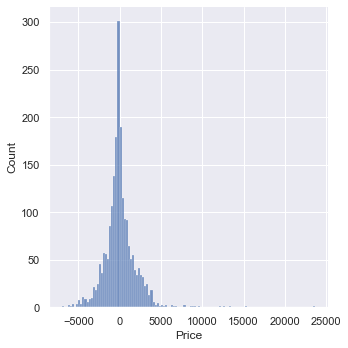

In [54]:
#4) Check best parameter and score
print(rf_random.best_params_)

prediction = rf_random.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()


In [56]:
#rf_random.score(X_train, y_train)

print(type(reg_rf),type(rf_random))

<class 'sklearn.ensemble._forest.RandomForestRegressor'> <class 'sklearn.model_selection._search.RandomizedSearchCV'>


### Saving the model to use it again

In [124]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [125]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [126]:
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

0.846247230813395